In [72]:
#importing all necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import quad,cumulative_trapezoid, simpson
import math
from sympy import elliptic_k
from sympy import elliptic_e
from sympy import elliptic_pi
from tqdm import tqdm

In [47]:
#% Plotting routines
def plotLarge():
    #%%
    SMALL_SIZE = 18
    MEDIUM_SIZE = 20
    BIGGER_SIZE = 24

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    #plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labelsc
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rcParams["font.family"] = "Times New Roman"

In [59]:
mu0= 1.25663706e-6  #magnetic permeability of free space (or medium if used)
I= 1    #current through a single coil
L= 51.7e-3  #length of solenoid
a= 51e-3    #radius of solenoid
rho= np.arange(0.001,a,0.001)   #r points for calculation
z=np.arange(0,0.1,0.0001)   #points along the axis of the solenoid

In [60]:
def eta(z,L,a):
    return (z+(L/2)) if a==1 else (z-(L/2))

def h2(a, rho):
    return 4*a*rho/((a+rho)**2)

def k2(a,rho,eta):
    return 4*a*rho/((a+rho)**2+eta**2)

In [96]:
#initialization of variables
valz=np.zeros([len(z),len(rho),2])
valr=np.zeros([len(z),len(rho),2])

#main loop for calculation of magnetic field at (r,z)
for j in tqdm(range(len(z))):
    for k in range(len(rho)):
        for i in [0,1]:

            cZ=(mu0*I)/(2*np.pi)*(1/L)*((a/rho[k])**0.5)
            cR=(mu0*I)/(2*np.pi)*(1/L)*(1/(a*rho[k])**0.5)

            valz[j,k,i]= cZ*(eta(z[j],L,i)*(k2(a,rho[k],eta(z[j],L,i))
                         **0.5)*(elliptic_k(k2(a,rho[k],eta(z[j],L,i)))+((a-rho[k])/(a+rho[k])
                         *elliptic_pi(h2(a,rho[k]),k2(a,rho[k],eta(z[j],L,i))))))
            
            valr[j,k,i]= cR*(((k2(a,rho[k],eta(z[j],L,i))-2)/math.sqrt(k2(a,rho[k],eta(z[j],L,i))))*elliptic_k(k2(a,rho[k],eta(z[j],L,i)))
                         +(2/math.sqrt(k2(a,rho[k],eta(z[j],L,i))))*elliptic_e(k2(a,rho[k],eta(z[j],L,i))))

Bz=valz[:,:,1]-valz[:,:,0]
Br=valr[:,:,1]-valr[:,:,0]

#Calculation of total magnetic field at (r,z)
B=np.zeros([Bz.shape[0],Bz.shape[1]])
for i in tqdm(range(Bz.shape[0])):
    for j in range(Bz.shape[1]):
        B[i,j]=math.sqrt(Bz[i,j]**2+Br[i,j]**2)

#reshaping for plotting - optional if not plotting
BMod=np.zeros([B.shape[0],B.shape[1]])
zMod=np.zeros([len(z)])
rhoMod=np.zeros([len(rho)])
for i in tqdm(range(B.shape[0])):
    for j in range(B.shape[1]):
        BMod[i,j]=B[(B.shape[0]-1-i),j]
        zMod[i]=z[len(z)-1-i]
        rhoMod[j]=rho[len(rho)-1-j]

100%|██████████| 1000/1000 [00:00<00:00, 31709.69it/s]


'        \n#reshaping for plotting - optional if not plotting\nBMod=np.zeros([B.shape[0],B.shape[1]])\nzMod=np.zeros([len(z)])\nfor i in tqdm(range(B.shape[1])):\n    BMod[i,:]=B[(B.shape[0]-1-i),:]\n    zMod[i]=z[len(z)-1-i]\n'

C:\Users\sumit\AppData\Local\Temp\ipykernel_25312\3859154014.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xticks = np.linspace(0, len(z) - 1, num_ticks, dtype=np.int)
C:\Users\sumit\AppData\Local\Temp\ipykernel_25312\3859154014.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current 

Text(10.722222222222209, 0.5, 'Radial distance, r (m)')

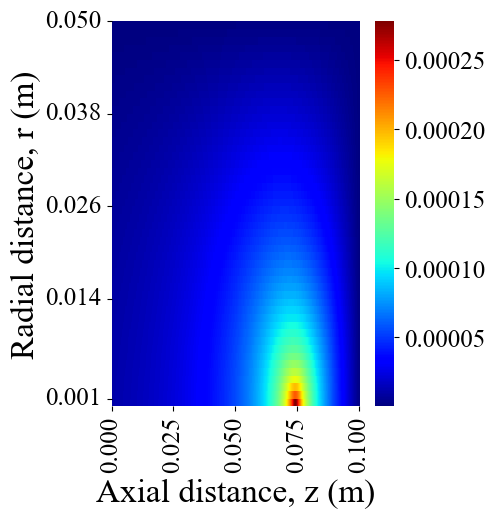

In [116]:
#plt.imshow(Bz)
#plt.colorbar()
#rearraning for plotting - the axis has to be flipped to represent distance on axis of solenoid at x axis
#can be changed later
dfMod=pd.DataFrame(data=BMod.T,index=rhoMod,columns=zMod)
fig,ax=plt.subplots(figsize=(4,5))

plotLarge()     #calling plotting routines to control text sizes, fonts etc.

# the index of the position of ticks, control ticks in the plot
num_ticks = 5
xticks = np.linspace(0, len(z) - 1, num_ticks, dtype=np.int)
yticks = np.linspace(0, len(rhoMod) - 1, num_ticks, dtype=np.int)
# the content of labels of these yticks
xticklabels = ['%.3f'%z[idx] for idx in xticks]
yticklabels = ['%.3f'%rhoMod[idx] for idx in yticks]

sns.heatmap(dfMod,cmap='jet',ax=ax)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(xticklabels)
ax.set_yticklabels(yticklabels)

ax.set_xlabel('Axial distance, z (m)')
ax.set_ylabel('Radial distance, r (m)')



<function matplotlib.pyplot.show(close=None, block=None)>

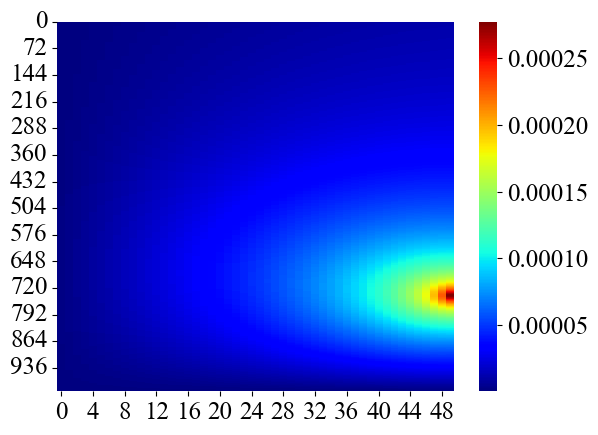

In [108]:
sns.heatmap(BMod,cmap='jet')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

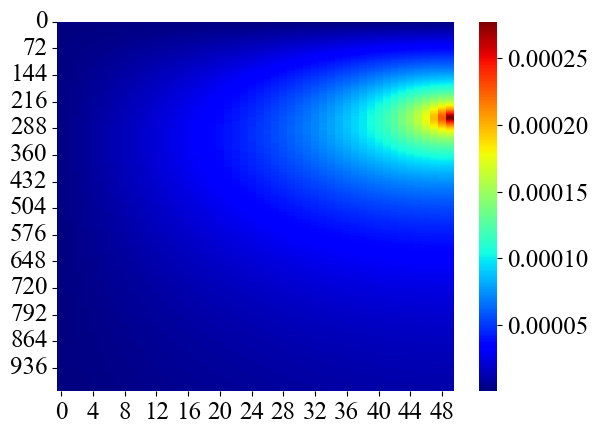

In [109]:
sns.heatmap(B,cmap='jet')
plt.show

In [106]:
rho

array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 ])

In [113]:
zMod

array([0.0999, 0.0998, 0.0997, 0.0996, 0.0995, 0.0994, 0.0993, 0.0992,
       0.0991, 0.099 , 0.0989, 0.0988, 0.0987, 0.0986, 0.0985, 0.0984,
       0.0983, 0.0982, 0.0981, 0.098 , 0.0979, 0.0978, 0.0977, 0.0976,
       0.0975, 0.0974, 0.0973, 0.0972, 0.0971, 0.097 , 0.0969, 0.0968,
       0.0967, 0.0966, 0.0965, 0.0964, 0.0963, 0.0962, 0.0961, 0.096 ,
       0.0959, 0.0958, 0.0957, 0.0956, 0.0955, 0.0954, 0.0953, 0.0952,
       0.0951, 0.095 , 0.0949, 0.0948, 0.0947, 0.0946, 0.0945, 0.0944,
       0.0943, 0.0942, 0.0941, 0.094 , 0.0939, 0.0938, 0.0937, 0.0936,
       0.0935, 0.0934, 0.0933, 0.0932, 0.0931, 0.093 , 0.0929, 0.0928,
       0.0927, 0.0926, 0.0925, 0.0924, 0.0923, 0.0922, 0.0921, 0.092 ,
       0.0919, 0.0918, 0.0917, 0.0916, 0.0915, 0.0914, 0.0913, 0.0912,
       0.0911, 0.091 , 0.0909, 0.0908, 0.0907, 0.0906, 0.0905, 0.0904,
       0.0903, 0.0902, 0.0901, 0.09  , 0.0899, 0.0898, 0.0897, 0.0896,
       0.0895, 0.0894, 0.0893, 0.0892, 0.0891, 0.089 , 0.0889, 0.0888,
      